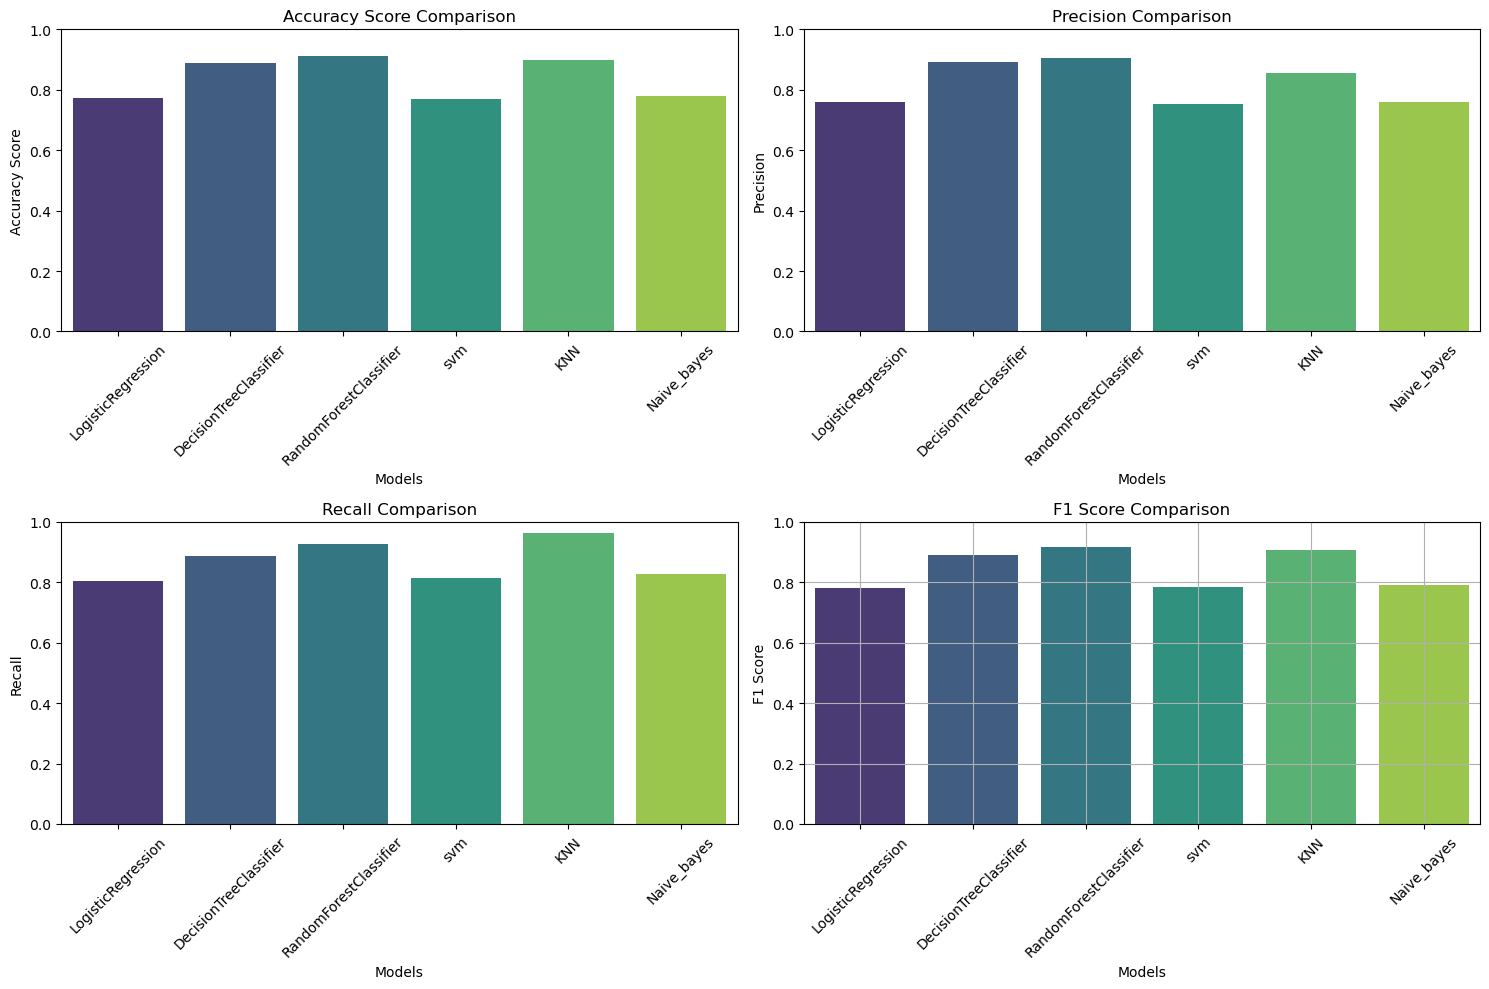

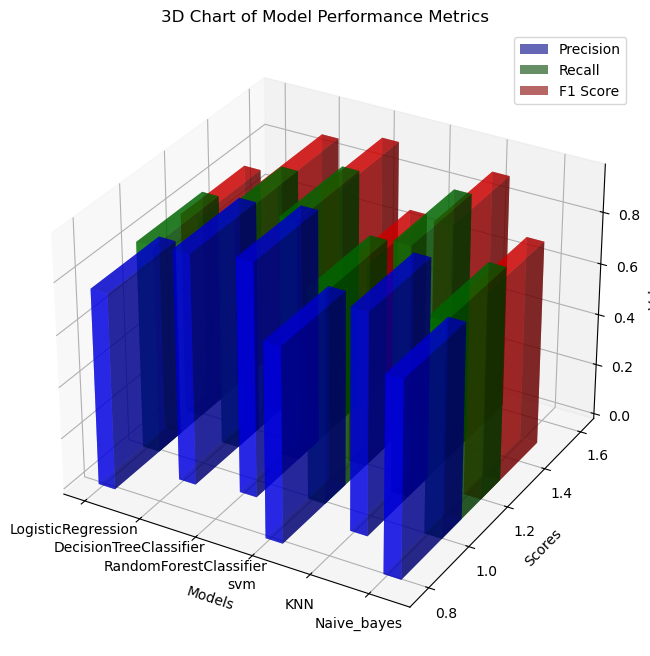

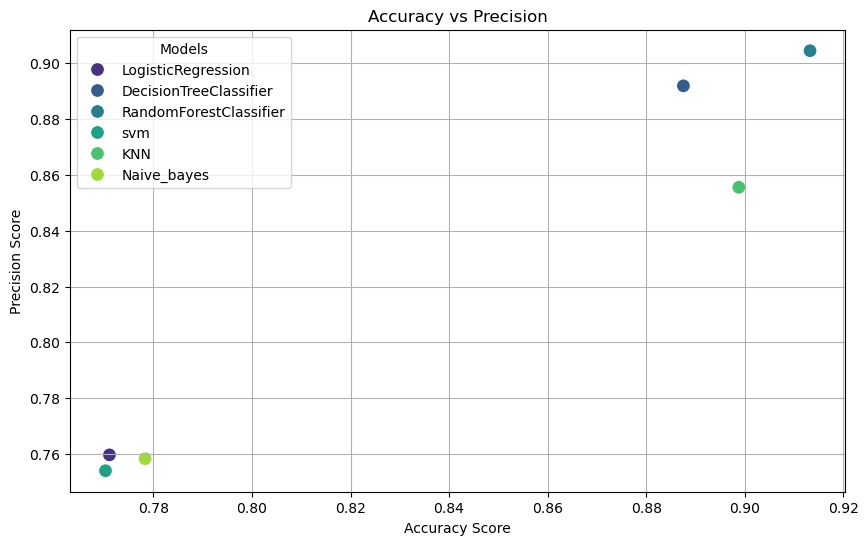

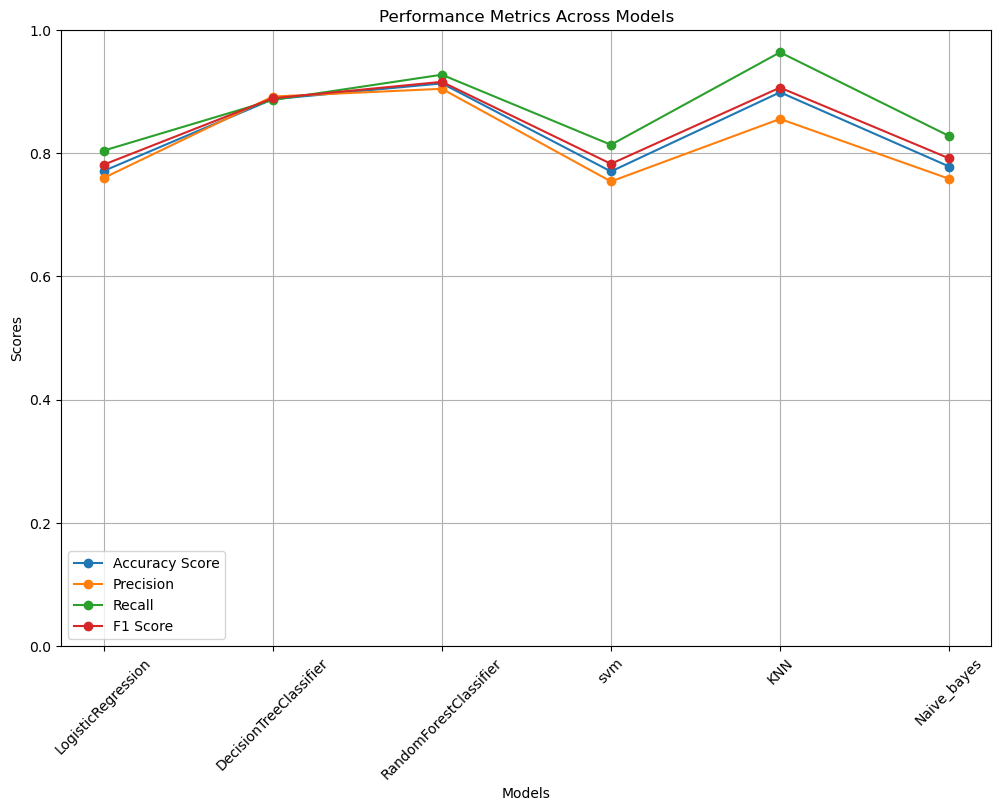

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_stroke_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns='stroke')
y = data['stroke']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=None),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=None),
    'svm': svm.LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive_bayes': GaussianNB()
}

# Initialize a dictionary to store metrics
calcs = {
    'Models': [],
    'score_train': [],
    'score_test': [],
    'accuracy_score': [],
    'recall': [],
    'precision': [],
    'f1_score': [],
    'cnf_matrix': []
}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    calcs['Models'].append(model_name)
    calcs['accuracy_score'].append(accuracy_score(y_test, y_pred))
    calcs['recall'].append(recall_score(y_test, y_pred))
    calcs['precision'].append(precision_score(y_test, y_pred))
    calcs['score_train'].append(model.score(X_train, y_train))
    calcs['score_test'].append(model.score(X_test, y_test))
    calcs['f1_score'].append(f1_score(y_test, y_pred))
    calcs['cnf_matrix'].append(metrics.confusion_matrix(y_test, y_pred))

# Convert metrics to DataFrame
models_df = pd.DataFrame(calcs)
models_df = models_df.set_index('Models')

# Define the metrics to plot
metric_names = ['accuracy_score', 'precision', 'recall', 'f1_score']

# Set the figure size for the plots
plt.figure(figsize=(15, 10))

# Metrics to plot
metrics = ['accuracy_score', 'precision', 'recall', 'f1_score']

# Use Seaborn for the bar plots
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=models_df.index, y=models_df[metric], palette='viridis', hue=models_df.index, dodge=False)
    plt.title(f'{metric.replace("_", " ").title()} Comparison')
    plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
    plt.xticks(rotation=45)  # Rotate model names for readability
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel('Models')

plt.tight_layout()  # Adjust to fit all labels
plt.grid(True)
plt.show()

# 3D Bar Chart for Accuracy Score, Precision, Recall, and F1 Score
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(len(models_df.index))
y = np.array(models_df['accuracy_score'])
z = np.zeros_like(x)

# Bar width and depth
dx = dy = 0.3

# Create bars for precision, recall, and f1_score
precision = models_df['precision'].values
recall = models_df['recall'].values
f1 = models_df['f1_score'].values

# Plotting 3D bars
ax.bar3d(x, y, z, dx, dy, precision, color='blue', alpha=0.6, label='Precision')
ax.bar3d(x, y + 0.2, z, dx, dy, recall, color='green', alpha=0.6, label='Recall')
ax.bar3d(x, y + 0.4, z, dx, dy, f1, color='red', alpha=0.6, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(models_df.index)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_zlabel('Values')
ax.set_title('3D Chart of Model Performance Metrics')
plt.legend()
plt.show()

# Scatter Plot for Accuracy and Precision
plt.figure(figsize=(10, 6))
sns.scatterplot(data=models_df, x='accuracy_score', y='precision', hue=models_df.index, palette='viridis', s=100)
plt.title('Accuracy vs Precision')
plt.xlabel('Accuracy Score')
plt.ylabel('Precision Score')
plt.grid(True)
plt.show()

# Line Graph of Metrics
plt.figure(figsize=(12, 8))
for metric in metric_names:
    plt.plot(models_df.index, models_df[metric], marker='o', label=metric.replace("_", " ").title())

plt.title('Performance Metrics Across Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
